# Bank Transaction Dataset for Fraud Detection

## Introduction
This dataset contains **2,512 bank transactions** with **16 features** related to transaction details, customer information, and device/location data. The goal is to analyze the dataset to detect fraudulent transactions and build a predictive model for fraud detection.

### Dataset Overview:
- **Rows**: 2,512 transactions
- **Columns**: 16 features (described below)

### Dataset Columns Description

Below is a detailed description of each column in the dataset:

1. **TransactionID**: Unique alphanumeric identifier for each transaction.
2. **AccountID**: Unique identifier for each account, with multiple transactions per account.
3. **TransactionAmount**: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
4. **TransactionDate**: Timestamp of each transaction, capturing date and time.
5. **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
6. **Location**: Geographic location of the transaction, represented by U.S. city names.
7. **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
8. **IP Address**: IPv4 address associated with the transaction, with occasional changes for some accounts.
9. **MerchantID**: Unique identifier for merchants, showing preferred and outlier merchants for each account.
10. **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
11. **CustomerAge**: Age of the account holder, with logical groupings based on occupation.
12. **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
13. **TransactionDuration**: Duration of the transaction in seconds, varying by transaction type.
14. **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.
15. **AccountBalance**: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
16. **PreviousTransactionDate**: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.

### Load the dataset

In [163]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/bank_transactions.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### Customizable Seaborn Plotting Functions for Enhanced Visuals


This notebook contains a set of custom plotting functions built with **Seaborn** and **Matplotlib** to enhance the aesthetics and consistency of data visualizations. These functions provide a unified theme with soft gray backgrounds and light gray accents, making them ideal for professional and polished charts. The custom functions include:

- **Boxplot:** A boxplot with customizable colors, line widths, and outlier markers.
- **Countplot:** A countplot with tailored color schemes and legend customizations.
- **Scatterplot:** A scatterplot with personalized point colors, border styles, and transparency.

These functions allow you to easily create consistent and visually appealing plots that align with your specific style preferences. Perfect for creating clean and clear visualizations in data analysis or presentation.

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global style for the plots with a gray background and soft white borders
sns.set_theme(style="whitegrid", palette="muted", rc={
    "axes.facecolor": "#284B63",  # Dark gray background for the axes
    "figure.facecolor": "#284B63",  # Dark gray background for the entire figure
    "grid.color": "#D9D9D9",  # Lighter gray for the grid lines
    "axes.grid": True,  # Show grid lines
    "axes.edgecolor": "#D9D9D9",  # Light gray borders for the axes
    "xtick.color": "#D9D9D9",  # Light gray color for X-axis tick labels
    "ytick.color": "#D9D9D9",  # Light gray color for Y-axis tick labels
    "axes.labelcolor": "#D9D9D9",  # Light gray color for axis labels
    "axes.titlesize": 14,  # Set the size of axis titles
    "axes.titleweight": 'bold',  # Make axis titles bold
})

# Create a custom function for boxplots
def custom_boxplot(*args, **kwargs):
    kwargs.setdefault("color", "#D9D9D9")  # Set box fill color to light gray
    kwargs.setdefault("flierprops", dict(markerfacecolor='#D9D9D9', marker='o', markersize=7))  # Set outliers style
    kwargs.setdefault("boxprops", dict(edgecolor='#D9D9D9', linewidth=1))  # Set box border style
    kwargs.setdefault("medianprops", dict(color='#D9D9D9', linewidth=1))  # Set median line style
    kwargs.setdefault("capprops", dict(color='#D9D9D9', linewidth=1))  # Set cap line style
    kwargs.setdefault("whiskerprops", dict(color='#D9D9D9', linewidth=1))  # Set whisker line style
    
    return sns.boxplot(*args, **kwargs)

# Custom countplot function with a specific color scheme
def custom_countplot(*args, **kwargs):
    # Customize the colors for countplots
    kwargs.setdefault("palette", "dark:#D9D9D9")  # Set bar color to light gray
    kwargs.setdefault("edgecolor", "#D9D9D9")  # Set bar border color to light gray
    
    # Create the countplot
    ax = sns.countplot(*args, **kwargs)

    # Customize legend if it exists
    legend = ax.legend()
    if legend:
        plt.setp(legend.get_texts(), color="#D9D9D9")  # Change the color of legend text
        legend.get_frame().set_edgecolor("#D9D9D9")  # Set border color of legend

    return ax

# Custom scatterplot function with a specific style
def custom_scatterplot(x, y, data, hue=None, **kwargs):
    kwargs.setdefault("edgecolor", "#D9D9D9")  # Set point border color
    kwargs.setdefault("s", 50)  # Set point size
    kwargs.setdefault("alpha", 0.7)  # Set transparency

    ax = sns.scatterplot(x=x, y=y, hue=hue, data=data, **kwargs)  # Add hue!

    # Force legend display if hue exists
    if hue:
        legend = ax.legend(title=hue, loc="best", frameon=True)
        if legend:
            for text in legend.get_texts():
                text.set_color("#D9D9D9")  # Alternative way to change color
            legend.get_frame().set_edgecolor("#D9D9D9")

    return ax



## Basic Dataset Information

Let’s explore the dataset's structure and summary statistics to understand its composition.

In [165]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

### Observations from `df.info()`:
- The dataset has **2,512 rows** and **16 columns**.
- There are **no missing values** in any column (all columns have 2,512 non-null entries).
- Data types include:
  - **Float64**: `TransactionAmount`, `AccountBalance`
  - **Int64**: `CustomerAge`, `TransactionDuration`, `LoginAttempts`
  - **Object**: All other columns (e.g., `TransactionID`, `AccountID`, `TransactionDate`, etc.)

In [166]:
# Display summary statistics for numerical columns
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Observations from `df.describe()`:

1. **TransactionAmount**:
   - Average: **\$297.59**, with a wide range from **\$0.26** to **\$1,919.11**.
   - 75% of transactions are below **\$414.53**.

2. **CustomerAge**:
   - Average age: **44.67 years**, ranging from **18** to **80**.
   - Median age: **45 years**.

3. **TransactionDuration**:
   - Average duration: **119.64 seconds**, ranging from **10** to **300 seconds**.
   - 75% of transactions complete in under **161 seconds**.

4. **LoginAttempts**:
   - Average: **1.12 attempts**, with most transactions (75%) involving only **1 attempt**.
   - Maximum attempts: **5**.

5. **AccountBalance**:
   - Average balance: **\$5,114.30**, ranging from **\$101.25** to **\$14,977.99**.
   - Median balance: **\$4,735.51**.


## Data Cleaning

In this section, we will go through essential **data cleaning** steps to prepare the dataset for further analysis or modeling. Data cleaning ensures that the data is accurate, consistent, and reliable by identifying and addressing potential issues.

Key steps in data cleaning include:

- **Handle Missing and Duplicated Values:** Identify and handle missing data, as well as duplicate records.
- **Data Conversion:** Convert data into consistent formats (e.g., date formatting, type conversion).
- **Outliers Check:** Detect and manage outliers that may affect data analysis.
- **Check Unique Values in Categorical Columns:** Review unique values in categorical columns to ensure data consistency and validity.

By following these steps, you’ll ensure your data is clean and ready for analysis or machine learning tasks.


### Handle Missing and Duplicated Values

In [167]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [168]:
df.duplicated().sum()


np.int64(0)

#### Observations:
No **Missing** or **Duplicated** values founded 

#### Action:
No actions needed

### Data Convertion

In [169]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


#### Description

In this step, we convert the columns **'TransactionDate'** and **'PreviousTransactionDate'** to the **datetime** format using `pd.to_datetime()`. This ensures that the dates are correctly recognized as datetime objects in Pandas, allowing for easier date manipulation, sorting, and comparison.


### Outliers Check

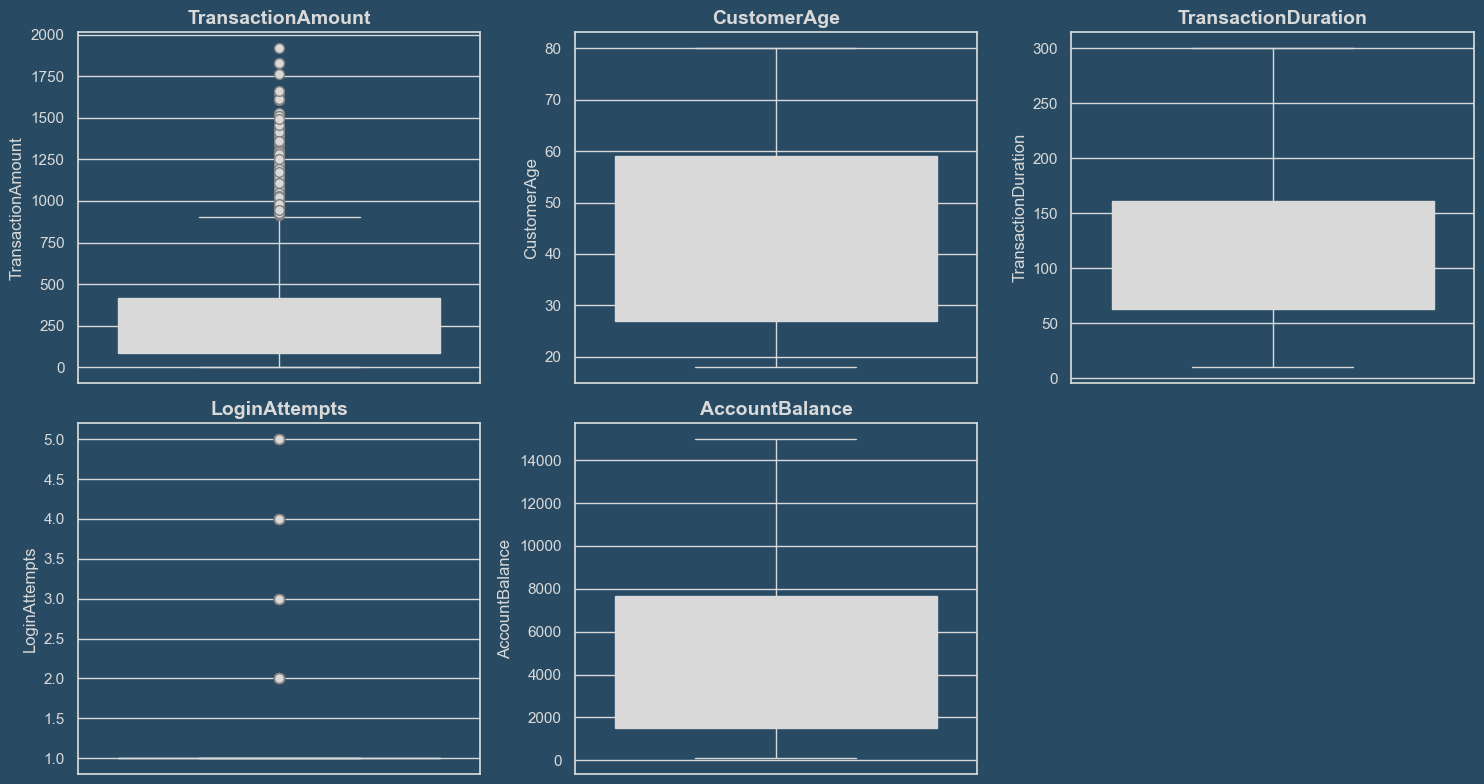

In [170]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    custom_boxplot(y=df[col]) 
    plt.title(col, color='#D9D9D9') 
plt.tight_layout()
plt.show()

### Observations:
1. **TransactionAmount**:
   - Some transactions have very high amounts (up to \$1,919.11), which could be outliers or legitimate large transactions.
2. **CustomerAge**:
   - The age range (18 to 80) is reasonable, with no outliers.
3. **TransactionDuration**:
   - Some transactions take up to 300 seconds (5 minutes), which might be outliers or indicate unusual activity.
4. **LoginAttempts**:
   - Most transactions involve 1 login attempt, but some have up to 5 attempts, which could indicate anomalies.
5. **AccountBalance**:
   - Some accounts have very high balances (up to \$14,977.99), which could be outliers or legitimate for high-net-worth individuals.

### Action:
- We’ll keep the outliers for now, as they might be important for fraud detection (e.g., unusually high transaction amounts or login attempts).

### Unique Values Categorical Columns

In [171]:
# Check unique values in categorical columns
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 

### Observations:
1. **TransactionType**:
   - Only two values: `Debit` and `Credit`. No inconsistencies.
2. **Location**:
   - All values are valid U.S. city names. No inconsistencies.
3. **DeviceID**:
   - All values are alphanumeric and unique. No inconsistencies.
4. **IP Address**:
   - All values are valid IPv4 addresses. No inconsistencies.
5. **MerchantID**:
   - All values are alphanumeric and unique. No inconsistencies.
6. **Channel**:
   - Only three values: `Branch`, `ATM`, and `Online`. No inconsistencies.
7. **CustomerOccupation**:
   - Only four values: `Student`, `Doctor`, `Engineer`, and `Retired`. No inconsistencies.


### Summary of Data Cleaning

1. **No Missing Values or Duplicates**:
   - The dataset is clean, with no missing values or duplicate rows.

2. **Data Type Conversion**:
   - `TransactionDate` and `PreviousTransactionDate` have been converted to `datetime`.

3. **Outliers**:
   - Outliers were identified in `TransactionAmount`, `TransactionDuration`, and `LoginAttempts`, but they were retained as they might be relevant for fraud detection.

4. **Categorical Data**:
   - No inconsistencies were found in categorical columns.

The dataset is now ready for **Exploratory Data Analysis (EDA)**.

## Exploratory Data Analysis (EDA)

In this step, we’ll explore the dataset visually and statistically to uncover patterns, trends, and relationships. EDA helps us understand the data better and identify potential features for fraud detection.

### Univariate Analysis


#### Numerical Columns

We are not using Account ID and Transaction ID because they are not relevant in this analysis


#### Transaction Amount

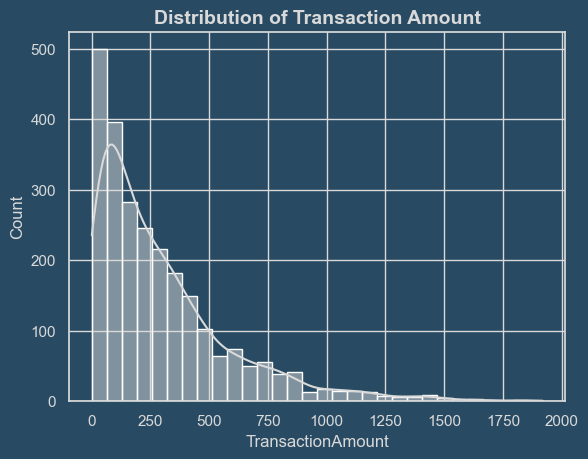

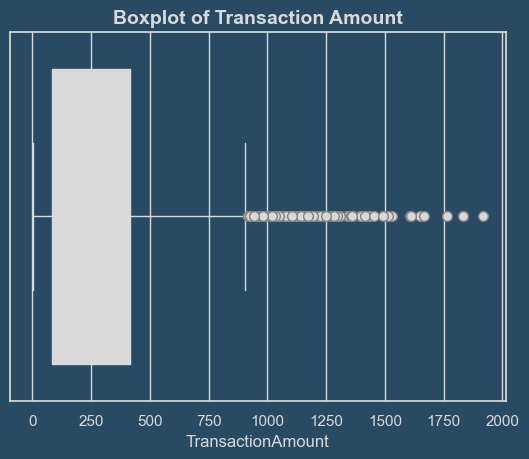

In [172]:
# Histogram for TransactionAmount
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Amount',color="#D9D9D9")
plt.show()

# Boxplot for TransactionAmount
custom_boxplot(x=df['TransactionAmount'])
plt.title('Boxplot of Transaction Amount',color="#D9D9D9")
plt.show()

#### Costumer Age

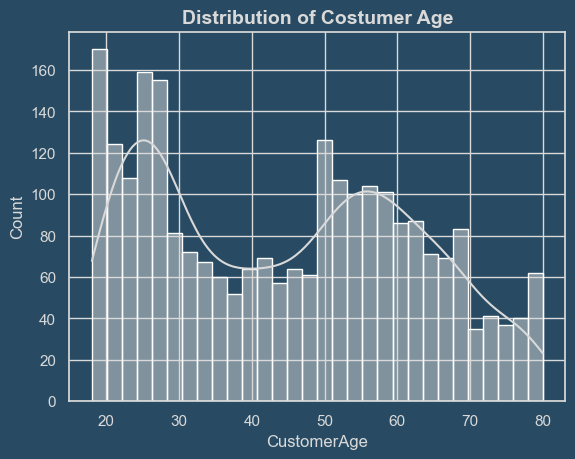

In [173]:

# Histogram for CustomerAge
sns.histplot(df['CustomerAge'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Costumer Age',color="#D9D9D9")
plt.show()


#### Account Balance

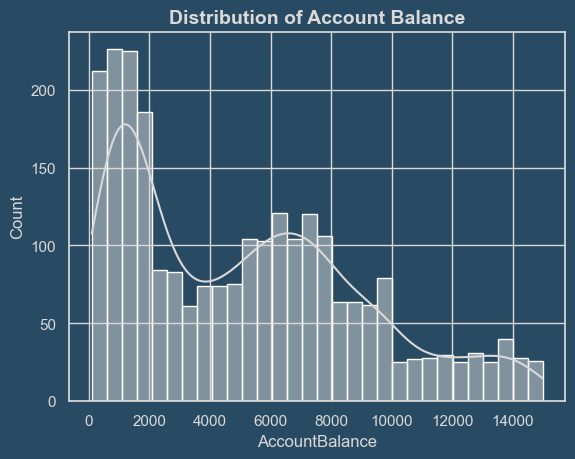

In [174]:

# Histogram for AccountBalance
sns.histplot(df['AccountBalance'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Account Balance',color="#D9D9D9")
plt.show()


#### Transaction Duration

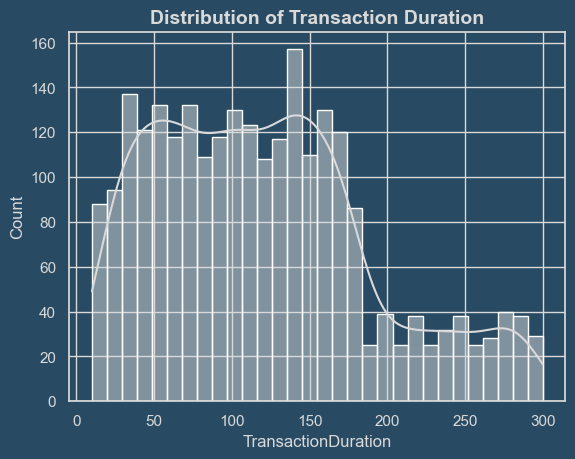

In [175]:

# Histogram for TransactionDuration
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Duration',color="#D9D9D9")
plt.show()



#### Login Attempts

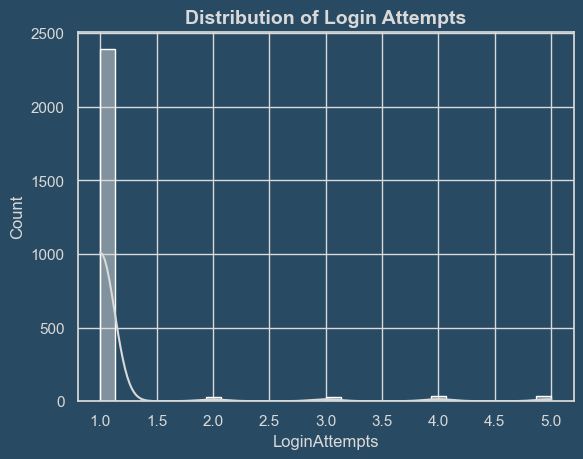

In [176]:

# Histogram for LoginAttempts
sns.histplot(df['LoginAttempts'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Login Attempts',color="#D9D9D9")
plt.show()


#### **Categorical Columns**

#### TransactionType

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_12832\3852562199.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


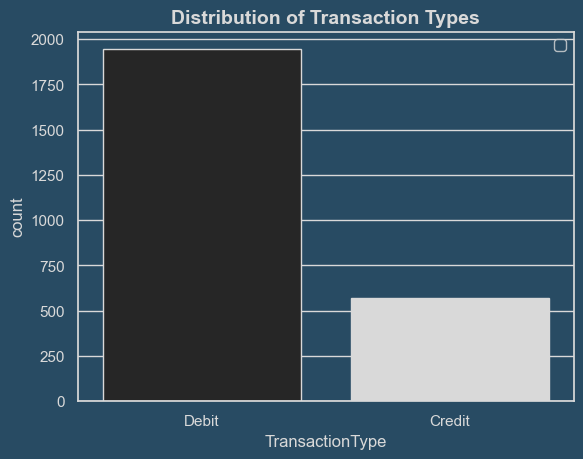

In [177]:
# Transaction Type
custom_countplot(x='TransactionType', hue='TransactionType' , data=df)
plt.title('Distribution of Transaction Types', color="#D9D9D9")
plt.show()


#### Location

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_12832\3852562199.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


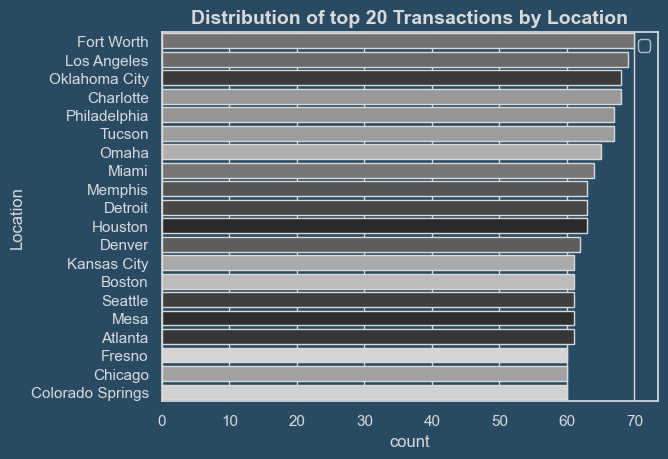

In [178]:
# Location

top_10_locations = df['Location'].value_counts().index[:20]

custom_countplot(y='Location', data=df, hue='Location', order=top_10_locations)
plt.title('Distribution of top 20 Transactions by Location', color="#D9D9D9")
plt.show()

#### Channel

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_12832\3852562199.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


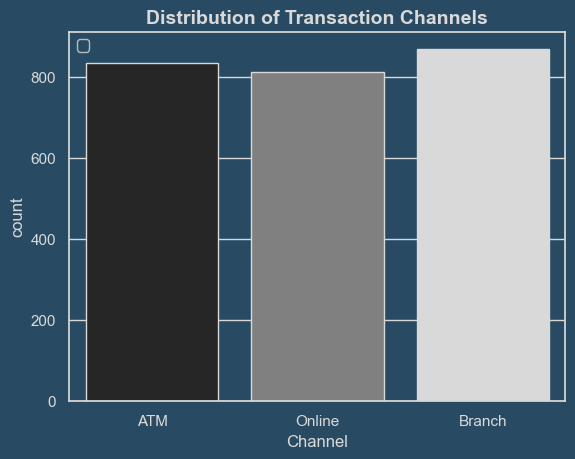

In [179]:
custom_countplot(x='Channel', hue='Channel', data=df)
plt.title('Distribution of Transaction Channels', color="#D9D9D9")
plt.show()

#### CustomerOccupation

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_12832\3852562199.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


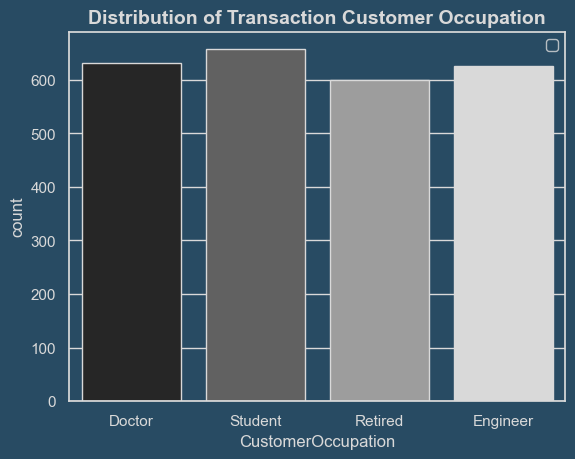

In [180]:
custom_countplot(x='CustomerOccupation' ,hue='CustomerOccupation' , data=df)
plt.title('Distribution of Transaction Customer Occupation', color="#D9D9D9")
plt.show()

### Bivariate Analysis

#### TransactionAmount vs AccountBalance

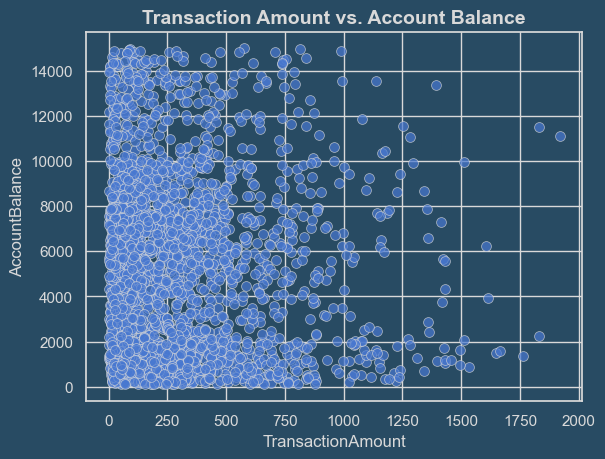

In [181]:
custom_scatterplot(x='TransactionAmount', y='AccountBalance', data=df, )
plt.title('Transaction Amount vs. Account Balance', color="#D9D9D9")
plt.show()

#### TransactionAmount vs CustomerAge



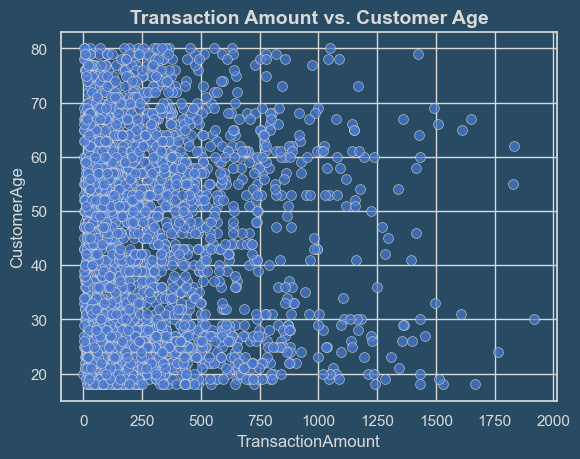

In [182]:
custom_scatterplot(x='TransactionAmount', y='CustomerAge', data=df)
plt.title('Transaction Amount vs. Customer Age', color="#D9D9D9")
plt.show()

#### TransactionAmount vs TransactionDuration



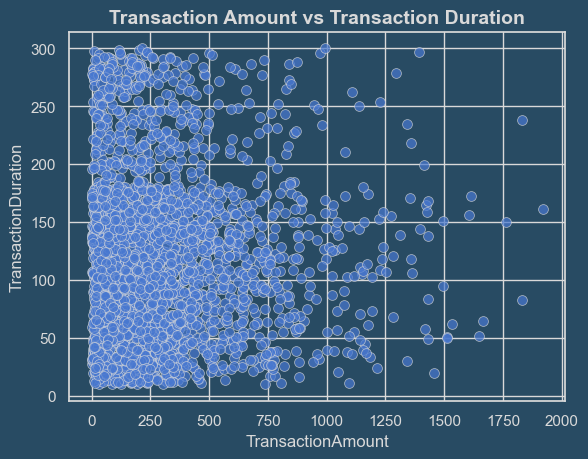

In [183]:
custom_scatterplot(x='TransactionAmount', y='TransactionDuration', data=df)
plt.title('Transaction Amount vs Transaction Duration', color="#D9D9D9")
plt.show()

#### AccountBalance vs CustomerAge	

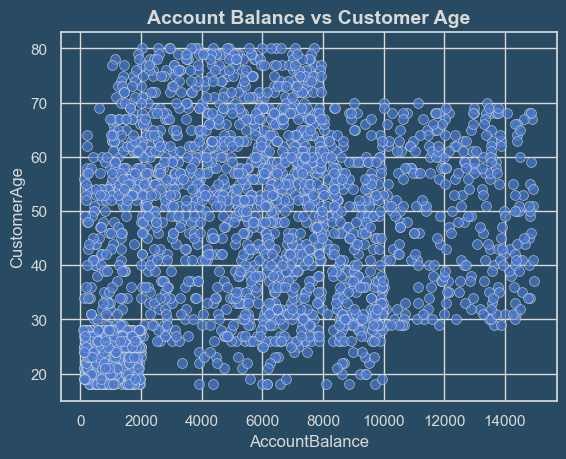

In [184]:
custom_scatterplot(x='AccountBalance', y='CustomerAge', data=df)
plt.title('Account Balance vs Customer Age', color="#D9D9D9")
plt.show()

#### AccountBalance vs TransactionDuration	

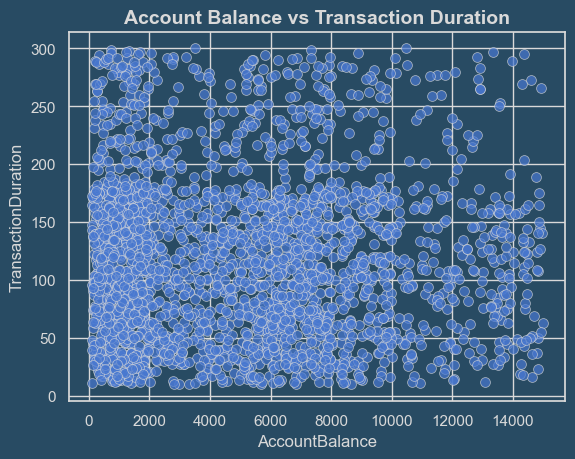

In [185]:
custom_scatterplot(x='AccountBalance', y='TransactionDuration', data=df)
plt.title('Account Balance vs Transaction Duration', color="#D9D9D9")
plt.show()

#### **Numerical vs Categorical**


#### TransactionAmount vs TransactionType



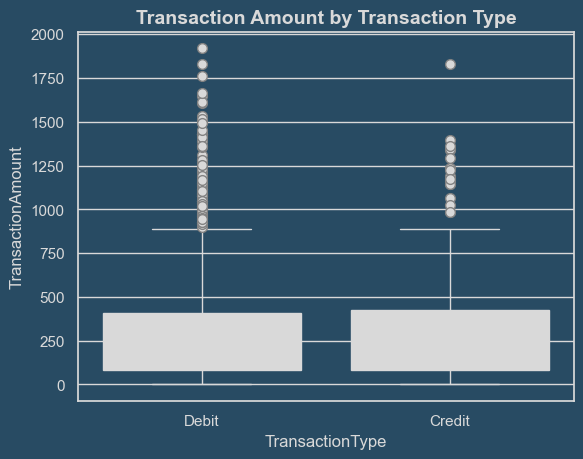

In [186]:
custom_boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type', color="#D9D9D9")
plt.show()

#### TransactionAmount vs Location



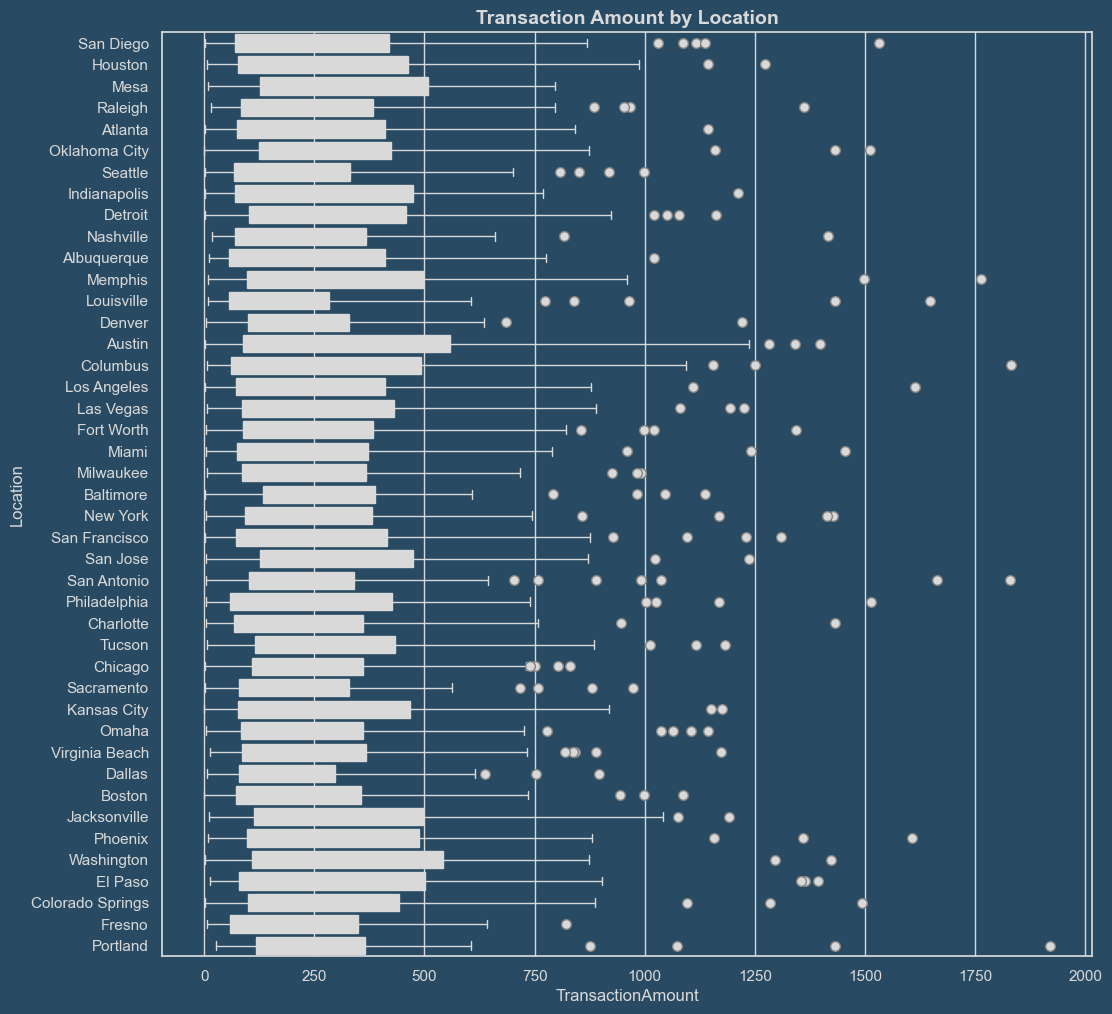

In [187]:
plt.figure(figsize=(12, 12))  # Aumentar tamaño
custom_boxplot(y='Location', x='TransactionAmount', data=df)
plt.title('Transaction Amount by Location', color="#D9D9D9")
plt.show()


#### TransactionAmount vs Channel



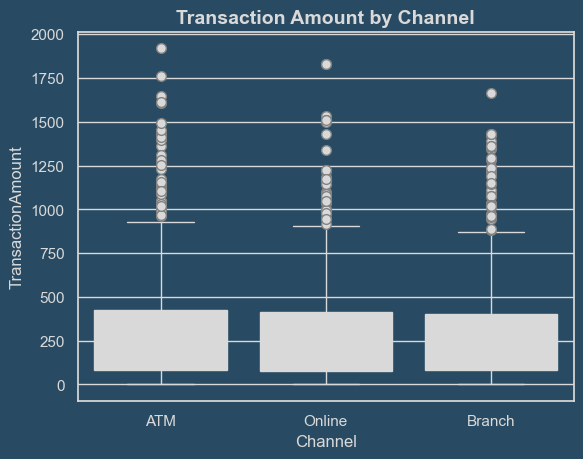

In [188]:
custom_boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Channel', color="#D9D9D9")
plt.show()

#### CustomerAge vs TransactionType	

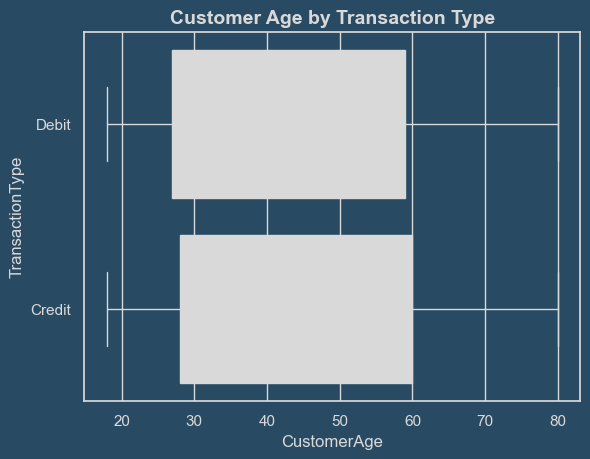

In [189]:
custom_boxplot(x='CustomerAge', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

#### AccountBalance vs TransactionType	

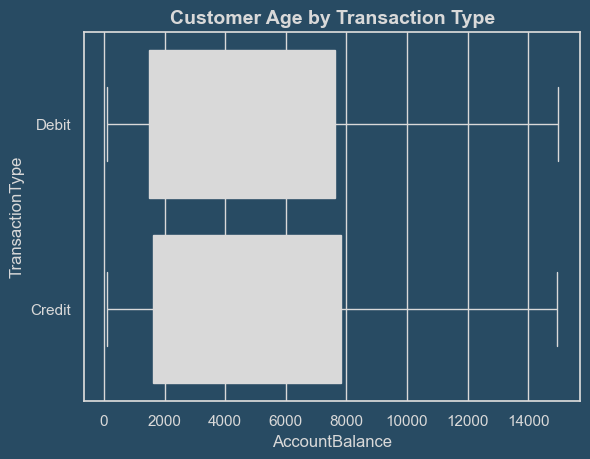

In [190]:
custom_boxplot(x='AccountBalance', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

#### **Categorical vs Categorical**


#### TransactionType vs Location

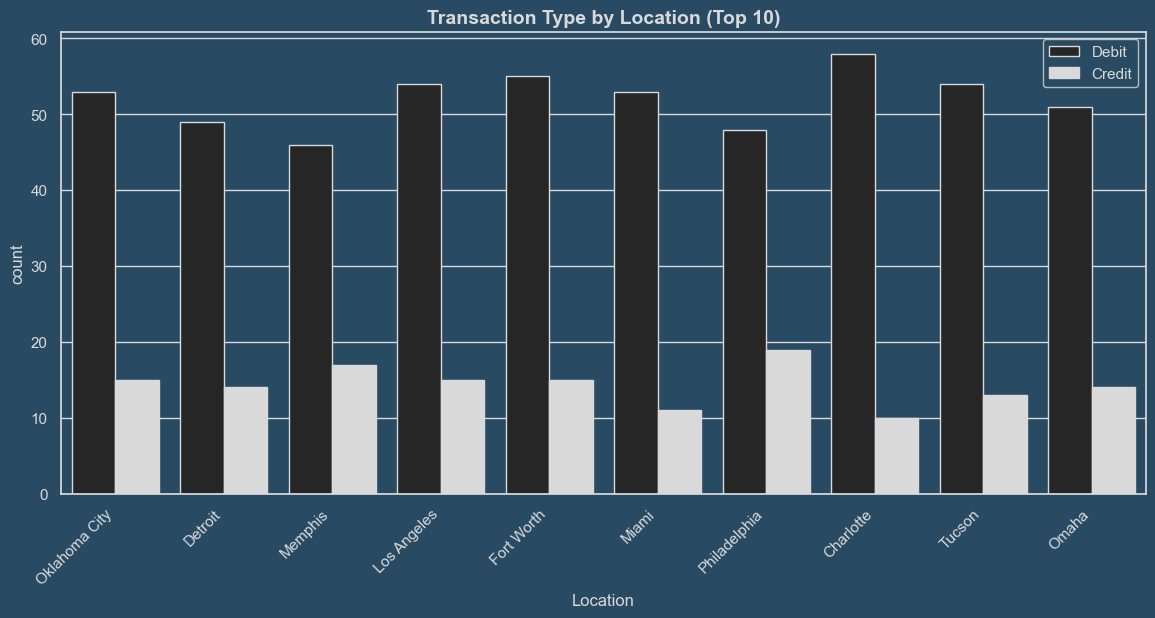

In [191]:
plt.figure(figsize=(14, 6))  # Aumentar el tamaño del gráfico
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]
custom_countplot(x='Location', hue='TransactionType', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas
plt.title('Transaction Type by Location (Top 10)', color="#D9D9D9")
plt.show()


#### TransactionType vs Channel

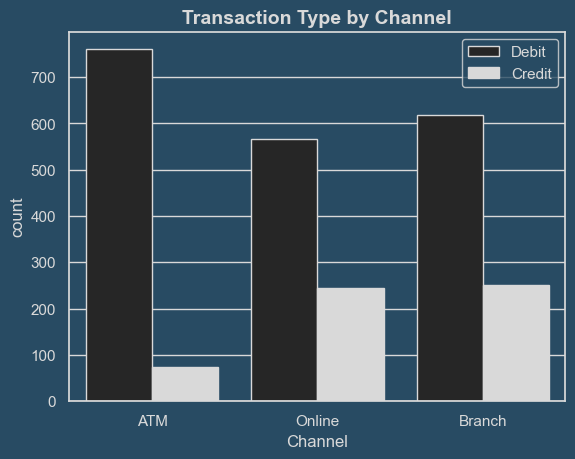

In [192]:
custom_countplot(x='Channel', hue='TransactionType', data=df)
plt.title('Transaction Type by Channel', color="#D9D9D9")
plt.show()

#### Location vs Channel	

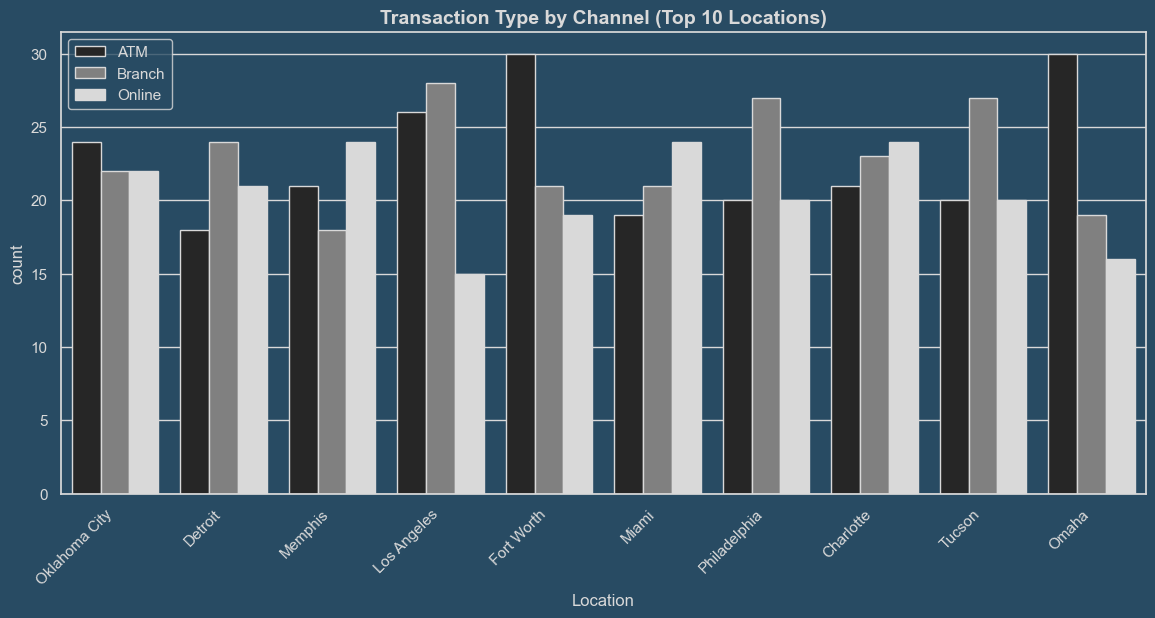

In [193]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='Channel', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Channel (Top 10 Locations)', color="#D9D9D9")
plt.show()


#### TransactionType vs CustomerOccupation

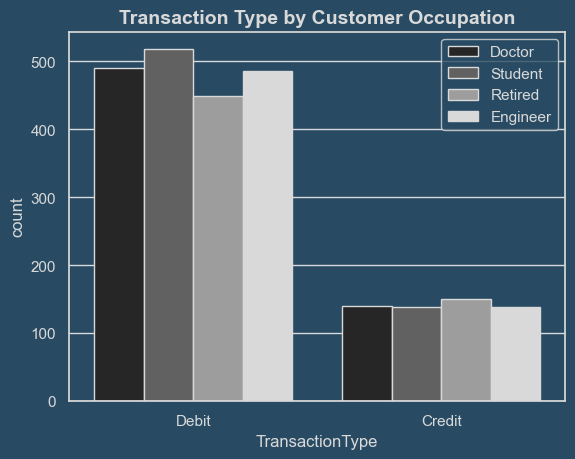

In [194]:
custom_countplot(x='TransactionType', hue='CustomerOccupation', data=df)
plt.title('Transaction Type by Customer Occupation', color="#D9D9D9")
plt.show()

#### Location vs CustomerOccupation	

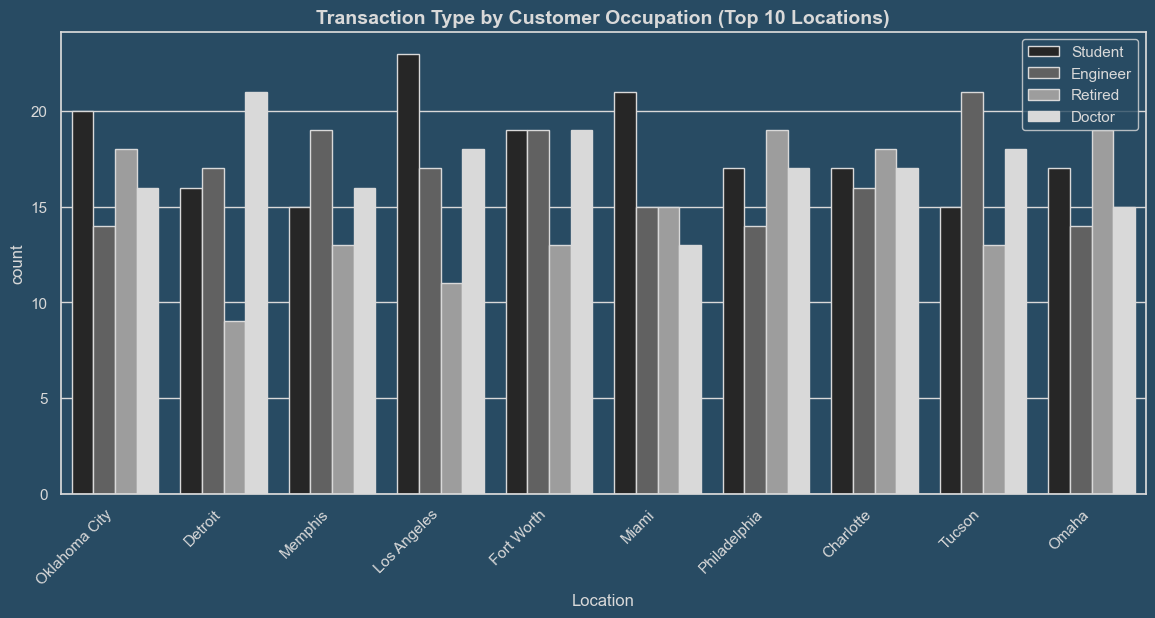

In [195]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='CustomerOccupation', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Customer Occupation (Top 10 Locations)', color="#D9D9D9")
plt.show()


### Multivariate Analysis

#### Correlation Heatmap of Numerical Variables

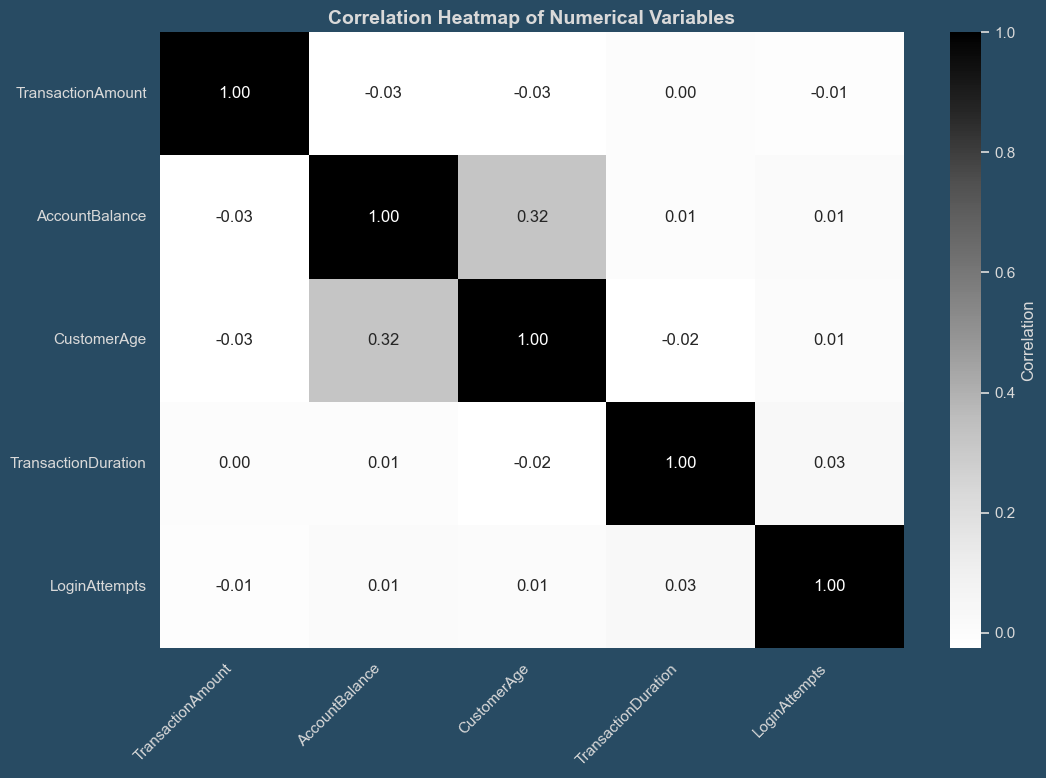

In [196]:
# Select numerical columns
numerical_columns = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Hacer el gráfico más grande para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(correlation_matrix, annot=True, cmap="Greys", fmt=".2f", annot_kws={"size": 12, "ha": "center", "va": "center"}, cbar_kws={'label': 'Correlation'})

# Personalización adicional
plt.title('Correlation Heatmap of Numerical Variables', color="#D9D9D9")
plt.xticks(rotation=45, ha="right", color="#D9D9D9")  # Rotar las etiquetas del eje X y color
plt.yticks(rotation=0, color="#D9D9D9")  # Cambiar color de las etiquetas del eje Y
plt.show()


#### Transaction Amount by Channel (Top 10 Devices)

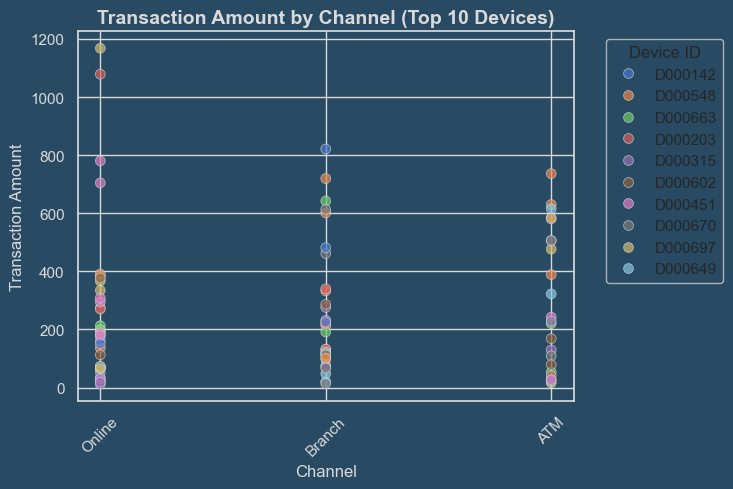

In [197]:
top_devices = df['DeviceID'].value_counts().nlargest(10).index
filtered_df = df[df['DeviceID'].isin(top_devices)]

custom_scatterplot(data=filtered_df, x='Channel', y='TransactionAmount', hue='DeviceID')
plt.title("Transaction Amount by Channel (Top 10 Devices)",color='#D9D9D9')
plt.xlabel("Channel")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Device ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Transaction Amount by Transaction Type and Age Group

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_12832\3852562199.py:27: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#D9D9D9'` for the same effect.

  return sns.boxplot(*args, **kwargs)


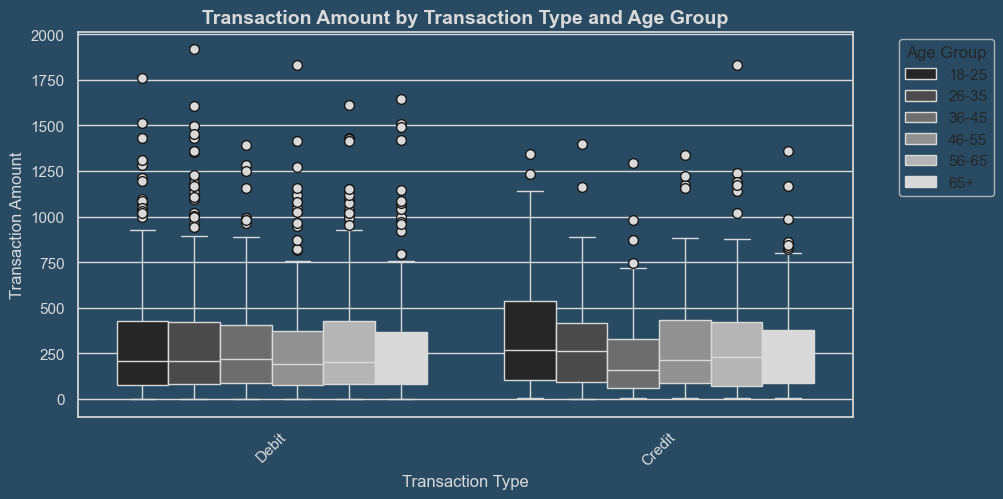

In [198]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[18, 25, 35, 45, 55, 65, 100], 
                        labels=["18-25", "26-35", "36-45", "46-55", "56-65", "65+"])

plt.figure(figsize=(10, 5))
custom_boxplot(data=df, x="TransactionType", y="TransactionAmount", hue="AgeGroup")
plt.title("Transaction Amount by Transaction Type and Age Group" ,color='#D9D9D9')
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Correlation Heatmap: Login Attempts, Account Balance & Duration

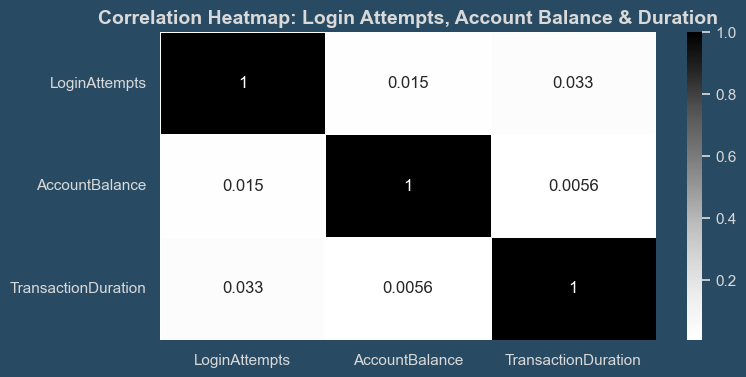

In [199]:
corr_matrix = df[['LoginAttempts', 'AccountBalance', 'TransactionDuration']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Greys", linewidths=0.5)
plt.title("Correlation Heatmap: Login Attempts, Account Balance & Duration",color='#D9D9D9')
plt.show()


#### Transaction Duration vs. Amount (Top 10 Locations)

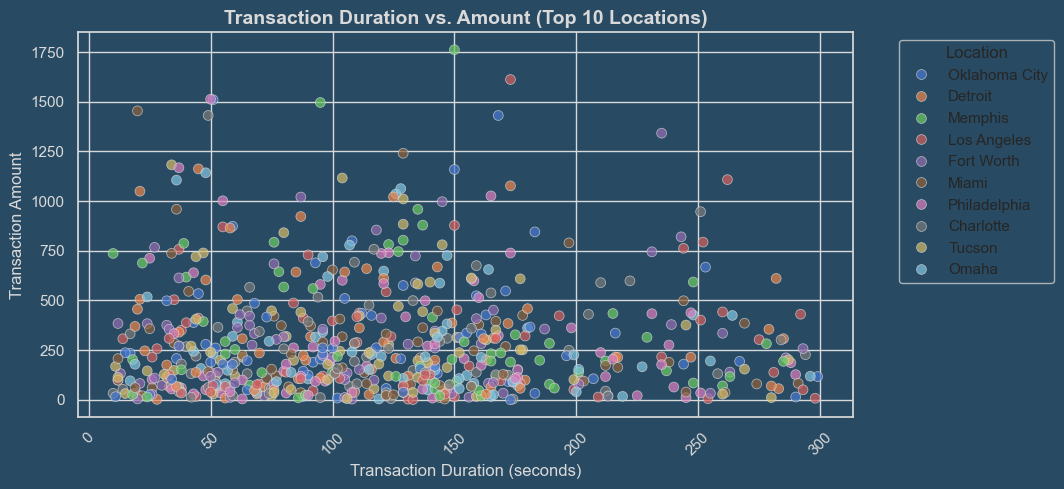

In [200]:
top_locations = df['Location'].value_counts().nlargest(10).index
filtered_df = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(10, 5))
custom_scatterplot(data=filtered_df, x="TransactionDuration", y="TransactionAmount", hue="Location", alpha=0.7)
plt.title("Transaction Duration vs. Amount (Top 10 Locations)",color='#D9D9D9')
plt.xlabel("Transaction Duration (seconds)")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Transaction Amount by Merchant (Top 10) and Channel

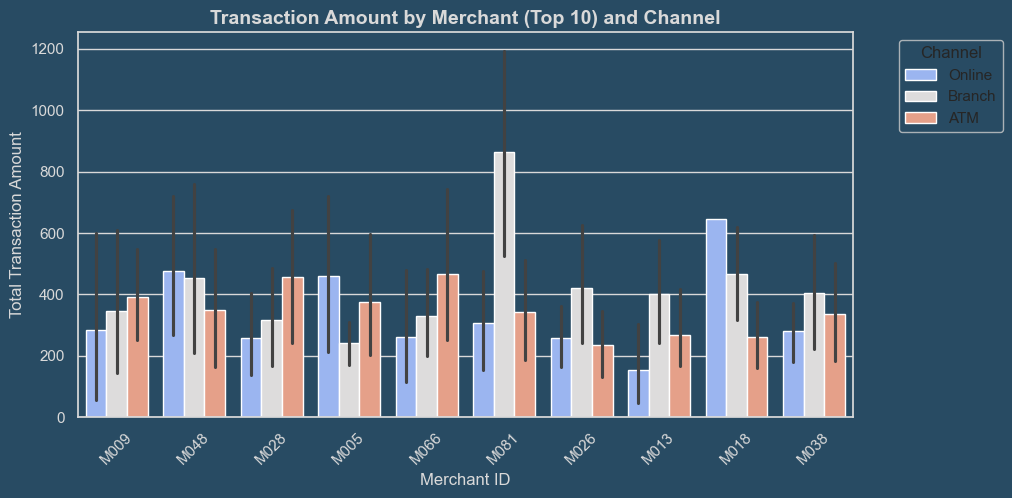

In [201]:
top_merchants = df.groupby("MerchantID")["TransactionAmount"].sum().nlargest(10).index
filtered_df = df[df["MerchantID"].isin(top_merchants)]

plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_df, x="MerchantID", y="TransactionAmount", hue="Channel", palette="coolwarm")
plt.title("Transaction Amount by Merchant (Top 10) and Channel",color='#D9D9D9')
plt.xlabel("Merchant ID")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## Feature Engineering

### Time-Based Features:

In [202]:
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TransactionHour'] = df['TransactionDate'].dt.hour

### Transaction Frequency:

In [203]:
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

### Device and IP Usage:

In [204]:
df['DeviceUsage'] = df.groupby('DeviceID')['AccountID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['AccountID'].transform('count')

### Merchant Preferences:

In [205]:
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')

## Data Preprocessing

### Label Encoding

In [206]:
# Encode categorical features
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

# One-hot encode the Channel column
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)

df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=False)

df.head()



,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,DeviceUsage,IPUsage,MerchantPreference,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,0,San Diego,D000380,162.198.218.92,M015,70,...,6,3,1,True,False,False,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,0,Houston,D000051,13.149.61.4,M052,68,...,5,4,1,True,False,False,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,0,Mesa,D000235,215.97.143.157,M009,19,...,5,7,1,False,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,0,Raleigh,D000187,200.13.225.150,M002,26,...,6,8,1,False,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,Atlanta,D000308,65.164.3.100,M091,26,...,3,4,1,False,False,True,False,False,False,True


###  Feature Scaling

In [207]:
# Select features for clustering
X = df[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
    'AccountBalance', 'TimeSinceLastTransaction', 'TransactionHour', 
    'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference',
    'TransactionType', 'Channel_ATM', 'Channel_Online', 'Channel_Branch', 'CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'  
]]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Potential Frauds with K-Means Clustering

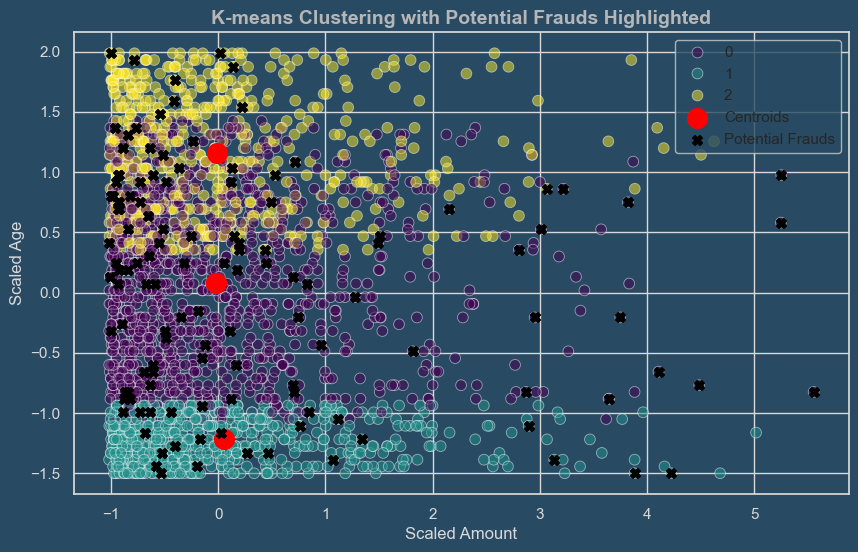

Number of potential frauds detected: 126


In [268]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted', color='#B6b6b6')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

In [209]:
frauds

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,MerchantPreference,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,KMeans_Cluster,Potential_Fraud
24,TX000025,AC00241,145.54,2023-03-02 16:43:56,0,Raleigh,D000036,119.186.154.104,M028,21,...,2,False,False,True,False,False,False,True,1,True
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,0,Miami,D000046,55.154.161.250,M029,23,...,1,True,False,False,False,False,False,True,1,True
51,TX000052,AC00482,424.56,2023-02-21 17:45:55,0,Omaha,D000598,179.43.245.131,M015,51,...,2,False,False,True,False,True,False,False,0,True
62,TX000063,AC00425,349.64,2023-11-07 16:48:23,0,Las Vegas,D000516,9.230.41.239,M097,48,...,2,False,False,True,False,True,False,False,0,True
67,TX000068,AC00460,521.06,2023-04-18 18:40:47,0,Albuquerque,D000305,131.41.45.13,M063,25,...,2,False,True,False,False,False,False,True,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,TX002327,AC00146,35.98,2023-08-17 16:14:47,1,Nashville,D000662,216.31.34.238,M004,40,...,2,False,True,False,True,False,False,False,0,True
2357,TX002358,AC00194,361.38,2023-03-02 17:02:57,1,Milwaukee,D000444,60.89.202.192,M095,72,...,2,False,False,True,False,False,True,False,2,True
2370,TX002371,AC00158,196.49,2023-12-22 17:31:59,0,Oklahoma City,D000342,139.23.212.102,M016,41,...,2,False,True,False,False,True,False,False,0,True
2423,TX002424,AC00340,332.06,2023-06-21 16:38:54,0,Seattle,D000365,94.37.250.128,M086,29,...,1,True,False,False,True,False,False,False,0,True


## DBSCAN

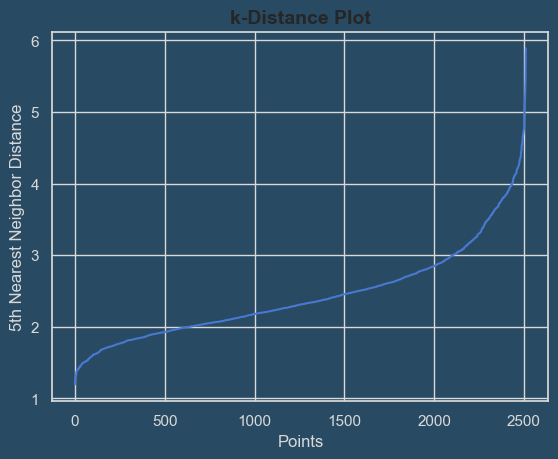

In [239]:
from sklearn.neighbors import NearestNeighbors

# Find the k-th nearest neighbor distances
neigh = NearestNeighbors(n_neighbors=5)  # Use min_samples as k
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort and plot the distances
distances = np.sort(distances[:, 4], axis=0)  # Use the 5th nearest neighbor distance
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

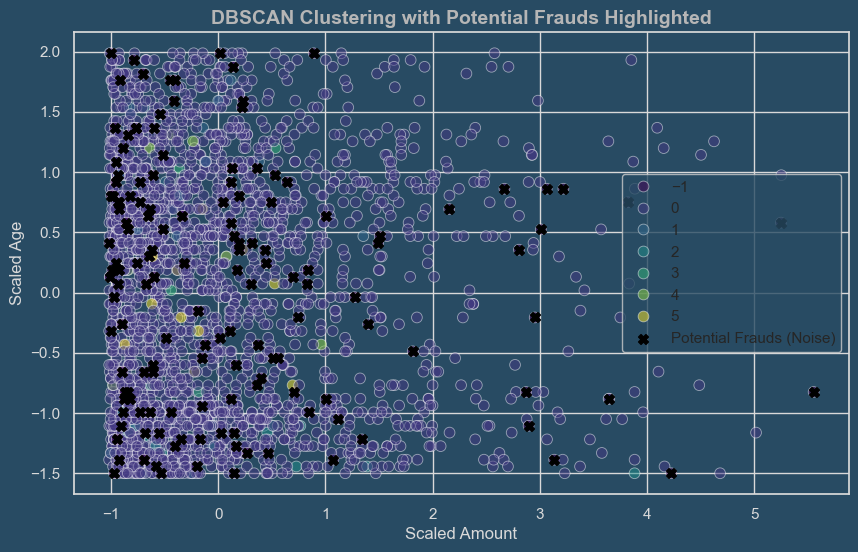

Number of potential frauds detected by DBSCAN: 146


In [267]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=7)  # Tune these hyperparameters
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Identify noise points (DBSCAN assigns -1 to outliers)
df['Potential_Fraud_DBSCAN'] = df['DBSCAN_Cluster'] == -1

# Separate fraudulent and non-fraudulent transactions
frauds_dbscan = df[df['Potential_Fraud_DBSCAN']]
non_frauds_dbscan = df[~df['Potential_Fraud_DBSCAN']]

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(X_scaled[dbscan_labels == -1, 0], X_scaled[dbscan_labels == -1, 1], 
            color='black', s=50, label='Potential Frauds (Noise)', marker='X')
plt.title('DBSCAN Clustering with Potential Frauds Highlighted', color='#B6b6b6')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected by DBSCAN
print(f"Number of potential frauds detected by DBSCAN: {len(frauds_dbscan)}")
